In [45]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



In [30]:
data = pd.read_csv("day.csv")



In [31]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [32]:
print(data.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [33]:
y = data["cnt"]
x = data[["temp","hum","windspeed","season","workingday"]]

In [34]:
x = sm.add_constant(x)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [36]:
poisson_model = sm.GLM(y_train,x_train,family=sm.families.Poisson())
poisson_result = poisson_model.fit()

In [37]:
print(poisson_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                  584
Model:                            GLM   Df Residuals:                      578
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4146e+05
Date:                Wed, 28 Jan 2026   Deviance:                   2.7701e+05
Time:                        04:49:22   Pearson chi2:                 2.67e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0390      0.004   1830.741      0.0

In [38]:
y_pred = poisson_result.predict(x_test)

In [39]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 2055864.3821845367


In [43]:
gaussian_model = sm.GLM(y_train, x_train, family=sm.families.Gaussian())
gaussian_result = gaussian_model.fit()

Y_pred_gaussian = gaussian_result.predict(x_test)


In [44]:
Y_pred_poisson = poisson_result.predict(x_test)

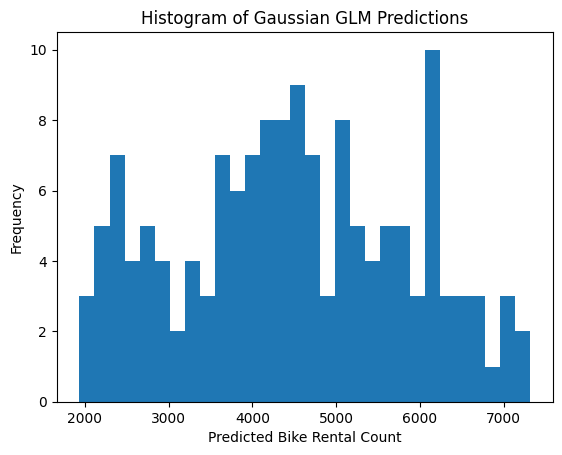

In [48]:
plt.figure()
plt.hist(Y_pred_gaussian, bins=30)
plt.xlabel("Predicted Bike Rental Count")
plt.ylabel("Frequency")
plt.title("Histogram of Gaussian GLM Predictions")
plt.show()


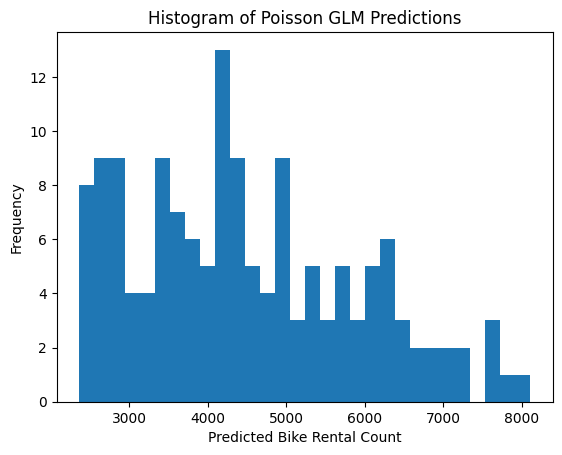

In [49]:
plt.figure()
plt.hist(Y_pred_poisson, bins=30)
plt.xlabel("Predicted Bike Rental Count")
plt.ylabel("Frequency")
plt.title("Histogram of Poisson GLM Predictions")
plt.show()
